<a href="https://colab.research.google.com/github/DiploDatos/AprendizajeProfundo/blob/add_2024_content/8_Redes_transformers_Taller_de_Modelos_de_Lenguaje_a_tu_medida_(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cr√©dito total al Taller de Modelos de Lenguaje a tu medida del Workshop Argentino de NLP (2023), dictado por Hern√°n Maina, Guido Ivetta, Laura Alonso Alemany y Luciana Benotti. El notebook original [se encuentra aqu√≠](https://github.com/nanom/llm_adaptation_2nlp_workshop/blob/main/notebook.ipynb), licenciado bajo [Licencia MIT](https://github.com/nanom/llm_adaptation_2nlp_workshop/blob/main/LICENSE).

# **IMPORTANTE**

* Todas las celdas indicadas con el s√≠mbolo ( ‚ùó ) son obligatorias y necesarias para el correcto funcionamiento del notebook.

* Aquellas se√±aladas con ( üîé ) son de profundizaci√≥n de contenido, optativas de leer y computar.

* Aquellas se√±aladas con ( üìñ ) son opcionales y expanden alg√∫n concepto en particular.

* Si una celda contiene el s√≠mbolo ( ‚è≥ ), significa que tomar√° m√°s tiempo en computarse que el promedio. Tener en cuenta para aprovechar al m√°ximo el tiempo disponible del taller.

# 0 - Inicializaci√≥n de la notebook

In [ ]:
# @markdown ‚ùó
# Instalaci√≥n de librer√≠as
!pip install -U transformers[torch] --quiet
!pip install -U tabulate --quiet
!pip install -U datasets --quiet

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.9/2.9 MB 38.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 40.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 474.3/474.3 kB 28.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.9/39.9 MB 19.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# @markdown ‚ùó
# Descarga de datasets
import os

ROOT_PATH = "llm_adaptation_2nlp_workshop"
DATASETS_PATH = os.path.join(ROOT_PATH, "datasets")

%rm -r "$ROOT_PATH"
!git clone https://github.com/nanom/llm_adaptation_2nlp_workshop.git "$ROOT_PATH"

rm: cannot remove 'llm_adaptation_2nlp_workshop': No such file or directory
Cloning into 'llm_adaptation_2nlp_workshop'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 94 (delta 42), reused 86 (delta 38), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 23.38 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
# @markdown ‚ùó
# Comprobaci√≥n de recursos (GPUs)
!nvidia-smi

Thu Sep 26 02:14:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 1 - Modelos de lenguaje

## üìñ Modelos de lenguaje y transformers

### ¬øQu√© son los "modelos de lenguaje"?

- Son modelos estad√≠sticos predictivos, basados en aprendizaje autom√°tico sobre textos.
- Su funci√≥n principal es **analizar** y/o **generar** texto de manera autom√°tica.
- Se entrenan encontrando patrones en grandes cantidades de texto libre.
- Dado un contexto (e.g. una secuencia de palabras), aplican los patrones inferidos para predecir la palabra siguiente, generando texto plausible y coherente.
- Si bien los modelos de lenguaje existen desde hace varias d√©cadas en diferentes formas (modelos markovianos, conditional random fields, redes neuronales recurrentes), actualmente cuando alguien habla de un "Modelo de Lenguaje", usualmente se refiere a un modelo neuronal de tipo **Transformer**.

#### ¬øQu√© es un **Transformer**?

- Es un tipo de arquitectura de redes neuronales que se introdujo en el paper ["Attention is All You Need"](https://arxiv.org/abs/1706.03762).

- El tipo de aprendizaje que hacen estas redes est√° basado en **mecanismos de atenci√≥n**, que ayudan al modelo a enfocarse en las partes m√°s determinantes de la informaci√≥n, de forma que el entrenamiento sea m√°s r√°pido y menos costoso que para otras arquitecturas, como las redes neuronales recurrentes.

<!-- La idea fundamental detras de un modelo Transformer, es procesar el lenguaje natural de una manera muy eficiente y efectiva, haciendolo ideal para ser aplicado a una gran cantidad de tareas de PLN.-->

- Existen diferentes variantes de transformer, de acuerdo a c√≥mo y qu√© parte de sus componentes utilizan:
    - Los modelos de traducci√≥n secuencia a secuencia o `Seq2Seq` (e.g. [T5](https://arxiv.org/abs/1910.10683)), tienen un **codificador y decodificador** y son empleados para tareas de transformaci√≥n como traducci√≥n, simplificaci√≥n, cambio de estilo o resumen.
    - Los modelos que s√≥lo usan el **codificador** (e.g. [BERT](https://arxiv.org/abs/1810.04805)) se usan para obtener representaciones vectoriales del texto (*embeddings*) que resultan muy √∫tiles para  determinar relaciones de semejanza entre diferentes textos.
    - Los modelos basados en el **decodificador** (e.g. [GPT](https://arxiv.org/abs/2005.14165)) se usan para generar texto autom√°ticamente, como respuestas a preguntas, ensayos o cuentos, entre otros.

<center><img src='https://heidloff.net/assets/img/2023/02/transformers.png' width=60%></center>

**Nota:** *Para una explicaci√≥n m√°s sencilla, pero m√°s detallada, sugiero los posts de la serie "The Illustrated..." de [Jay Alammar](http://jalammar.github.io/):*
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated BERT](http://jalammar.github.io/illustrated-bert/)
- [The Illustrated GPT-2](http://jalammar.github.io/illustrated-gpt2/) / [How GPT-3 Works](http://jalammar.github.io/how-gpt3-works-visualizations-animations/)

## Probamos un BERT mediante la tarea *fill-mask*

En esta secci√≥n vamos a practicar con [BERT](https://en.wikipedia.org/wiki/BERT_(language_model)), un modelo de lenguaje con una arquitectura compuesta de **codificadores** (encoders).


Para familiarizarnos con BERT, vamos a jugar con la tarea "*Fill-Mask*", cuyo objetivo es completar una oraci√≥n con algunas palabras, en los lugares marcados con `[MASK]`.

El modelo de lenguaje predecir√° las palabras m√°s adecuadas para encajar en esos espacios en blanco, es decir, las m√°s probables dado el contexto, seg√∫n los patrones estad√≠sticos inferidos de los ejemplos de aprendizaje. Esto nos sirve para evaluar qu√© tan bien est√° modelando los textos.

In [ ]:
# @markdown üîé
# Usamos pipeline como funci√≥n auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="dccuchile/bert-base-spanish-wwm-uncased",
    top_k=5  #va a devolver 5 predicciones m√°s probables
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From üëâv4.50üëà onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# @markdown üîé
ejemplo = 'C√≥rdoba es una [MASK] de Argentina.'
fill_mask(ejemplo)

[{'score': 0.3897227346897125,
  'token': 4933,
  'token_str': 'localidad',
  'sequence': 'c√≥rdoba es una localidad de argentina.'},
 {'score': 0.2656591236591339,
  'token': 1698,
  'token_str': 'ciudad',
  'sequence': 'c√≥rdoba es una ciudad de argentina.'},
 {'score': 0.09350410848855972,
  'token': 3827,
  'token_str': 'provincia',
  'sequence': 'c√≥rdoba es una provincia de argentina.'},
 {'score': 0.04004675894975662,
  'token': 3562,
  'token_str': 'especie',
  'sequence': 'c√≥rdoba es una especie de argentina.'},
 {'score': 0.023548586294054985,
  'token': 29075,
  'token_str': 'subespecie',
  'sequence': 'c√≥rdoba es una subespecie de argentina.'}]

## Probamos un GPT para la tarea de generaci√≥n de texto

En esta secci√≥n vamos a practicar con [GPT](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer), un modelo de lenguaje generativo con una arquitectura basada en transformers.

Vamos a jugar con la funci√≥n de generaci√≥n del modelo, que, dada una secuencia de palabras, predice la continuaci√≥n m√°s probable para la misma, seg√∫n los patrones inferidos en los ejemplos de aprendizaje.

In [ ]:
# @markdown üîé
# Usamos pipeline como funci√≥n auxiliar de alto nivel
from transformers import pipeline

text_gen = pipeline(
    task="text-generation",
    model="gpt2",
    pad_token_id=50256,
    device='cuda',
)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# @markdown üîé
ejemplo="My name is Lewis and I like to"
text_gen(ejemplo)

[{'generated_text': "My name is Lewis and I like to call myself the 'Big Guy' because he's the most famous guy in the business, and he's the first star to ever get a job doing it. Because all that was happening in the mid-90"}]

# 2 - Librer√≠as para modelos de lenguaje


## Hugging Face ü§ó

###  ¬øQu√© es Hugging Face ü§ó?

- Una [comunidad colaborativa](https://huggingface.co/) especialmente enfocada en modelos de lenguaje y otros recursos de Inteligencia Artificial (IA).
- Ofrece repositorios para disponibilizar [modelos](https://huggingface.co/models), [datasets](https://huggingface.co/datasets) y [demos](https://huggingface.co/spaces).
- Adem√°s, ofrece varias librer√≠as orientadas a la IA, particularmente al Aprendizaje Profundo (*Deep Learning*), entre las que destacan:
    - [`transformers`](https://huggingface.co/docs/transformers): La que veremos en esta charla, para todo lo relacionado a Procesamiento del Lenguaje Natural (PLN) con grandes modelos de lenguaje (*Large Language Models*, LLMs).
    - [`datasets`](https://huggingface.co/docs/datasets): Una librer√≠a con funcionalidades para el tratamiento de los conjuntos de datos a utilizar para entrenar o ajustar los LLMs.
    - [`tokenizers`](https://huggingface.co/docs/tokenizers): Una librer√≠a para el proceso de "tokenizaci√≥n", i.e. la divisi√≥n de texto de manera discreta en palabras o subpalabras.
- Hugging Face no s√≥lo ofrece soluciones para PLN, sino tambi√©n para im√°genes, con librer√≠as como [`diffusers`](https://huggingface.co/docs/diffusers), para la generaci√≥n de im√°genes:
    - Lectura recomendada: [The Illustrated Stable Diffusion](http://jalammar.github.io/illustrated-stable-diffusion/)

### ¬øC√≥mo empezar con Hugging Face ü§ó?

- Primero se [crea una cuenta en la p√°gina](https://huggingface.co/join).
- Luego podemos [crear modelos](https://huggingface.co/new) a trav√©s del men√∫ que se despliega de nuestro avatar.
- Para poder subir el modelo personalizado que entrenaremos en esta notebook en tu cuenta de Hugging Face, necesitar√°s generar un token de acceso mediante los siguentes pasos:

> 1. **Acced√©** a la [secci√≥n de tokens de acceso](https://huggingface.co/settings/tokens) de tu perfil:
    <center><img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/User-Access-Token.png" width=70%></center>

> 2. Cre√° un **nuevo token** de acceso con permiso de escritura:
    <center><img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/new-token.png" width=60%></center>
    
> 3. **Listo!**. Ya ten√©s tu token preparado para poder subir tu modelo a la plataforma de Hugging Face ü§ó.

# 3 - ¬øC√≥mo se entrenan los modelos de lenguaje?

En esta notebook **NO** vamos a entrenar completamente un LLM, porque los LLMs requieren de muchos datos y mucho c√≥mputo para ser entrenados:
- Para **BERT**:
    - El costo total estimado de entrenamiento del modelo fue de U\$D 6912 (para su version *large*) y de U\$D 500 (para su versi√≥n *base*).
    - Mientras que la versi√≥n peque√±a (*base*) cuenta con 109M de par√°metros, su versi√≥n original (*large*) oscila en 334M, m√°s del triple.
    - Su entrenamiento fue realizado sobre 3.3B de tokens (aproximadamente 20 GB de texto no comprimido).

- Para **GPT-3**:
    - Se estim√≥ un costo de entrenamiento cercano a los U\$D 4.6 Millones.
    - Disponible en ocho tama√±os, que van desde los 125M a los 175B par√°metros.
    - Requiri√≥ de varias semanas de entrenamiento.
    - El corpus reportado en el cual fue entrenado es de aproximadamente 500B de palabras.
    - Se necesito de varias GPUs y hardware especializado para entrenarlo.

Sin embargo, vamos a **entrenar parcialmente** un modelo de lenguaje, en concreto, vamos a adaptarlo a un dominio particular.


## üìñ Pre-training, fine-tuning y domain adaptation


### Diferencia entre pre-training y fine-tuning

La distinci√≥n clave entre `pre-training` y `fine-tuning` se encuentra en las etapas del proceso de entrenamiento:

* El **pre-training**, es la primera fase de entrenamiento al que se somete todo modelo LLM, y requiere de una enorme cantidad de textos gen√©ricos, como se ha descrito en el apartado anterior.

* Una vez finalizado este proceso inicial de entrenamiento, se obtiene un modelo gen√©rico capaz de realizar predicciones gen√©ricas sobre patrones textuales, pero sin especializaci√≥n en ninguna tareas espec√≠ficas.

* Si deseamos adaptar este modelo gen√©rico para que desempe√±e una tarea espec√≠fica con un alto rendimiento (e.g.: *Text Clasification*, *Sentiment analysis*, *Question Answering*, *Information Extraction*, etc.), se lleva a cabo una segunda etapa de entrenamiento conocida como **fine-tuning**.

<center>
<!-- <img src="https://serokell.io/files/7i/7iyrq1z5.Inside_ChatGPT_pic1.png" width=80%>-->
<img src="https://miro.medium.com/v2/resize:fit:951/0*R31A71UjHM8R8Pps.png" width=80%>
</center>
<right> fuente: https://medium.com/mantisnlp/supervised-fine-tuning-customizing-llms-a2c1edbf22c3
</right>

Este entrenamiento espec√≠fico requiere de menos ejemplos de entrenamiento y menos c√°lculo, ya que s√≥lo modifica ligeramente el modelo ya entrenado. En este proceso, existen var√≠as formas en como se "modifica" el modelo pre-entrenado durante esta fase: se pueden modificar las √∫ltimas capas, a√±adir capas a la red pre-entrenada, y otras variantes. En esta notebook vamos a trabajar con una aproximaci√≥n sencilla, pero existen m√∫ltiples librer√≠as en Hugging Face que implementan funcionalidades para llevar adelante diferentes tipos de *fine-tuning*, como por ejemplo la popular [LoRA](https://www.databricks.com/blog/efficient-fine-tuning-lora-guide-llms).

<!--<center>
<img src="https://media.licdn.com/dms/image/D5612AQEe2e_DJ51f2g/article-inline_image-shrink_1000_1488/0/1687324002269?e=1699488000&v=beta&t=vWDbM2RYNKa9tv5--w6Iub7YRRGkjld-s7U6VDd_7_Q" width=80%>

</center>
<right> fuente: https://www.linkedin.com/pulse/beginners-guide-fine-tuning-large-language-models-vaidheeswaran
</right>-->

### *Domain Adaptation*

Mientras que el *fine-tuning* se centra en ajustar un modelo de lenguaje *pre-entrenado* para realizar tareas espec√≠ficas, la `adaptaci√≥n de dominio` se enfoca en hacer que el modelo sea m√°s efectivo en un dominio de datos particular.

En caso de que tus datos de entrenamiento pertenezcan a un determinado tema espec√≠fico (e.g.: leyes, medicina, inform√°tica, etc.) o un estilo espec√≠fico (e.g.: acad√©mico, infantil, publicitario, etc.), y difieran substancialmente del corpus est√°ndar en el cual fue entrenado inicialmente el LLM, podemos pensar diferentes opciones para incorparar este nuevo conocimiento:


1. **Entrenamiento desde cero:** Este enfoque implica entrenar desde cero (*from scratch*) un nuevo modelo de lenguaje con textos del dominio de inter√©s. Sin embargo, no es recomendable para el p√∫blico en general, dada la gran cantidad de recursos computacionales, horas de procesamiento y textos de entrenamiento necesarios para lograr un rendimiento comparable a los modelos estado del arte (modelos *state-of-the-art, SOTA*).
2.  **Uso de modelos disponibles:** Se aprovechan modelos disponibles p√∫blicamente, espec√≠ficos para el dominio de inter√©s (e.g: [LegalBERT](https://arxiv.org/abs/2010.02559), [FinBERT](https://arxiv.org/abs/1908.10063) y [BioBERT](https://arxiv.org/abs/1901.08746); todos disponibles en Hugging Face ü§ó de manera gratuita.)
3. **Adaptaci√≥n de modelos pre-entrenados**: Esta aproximaci√≥n, tambien conocida en la literatura como *'further pre-training'*, *'inter-training'*, *'continued pre-training'* o *'domain-adaptation'*, implica tomar un modelo de lenguaje pre-entrenado y, aprovechando todo el conocimiento y las representaciones ya aprendidas, **continuar su entrenamiento sobre el conjunto de datos especializados o personalizados**. Esta t√©cnica permite alcanzar muy buenos resultados, utilizando menos recursos computacionales, horas y datos de entrenamiento.

<center>
<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*4eNaH6y0dSsaxtTQW0tgHQ.png" width=80%>
</center>
<right> fuente: https://medium.com/@shankar.arunp/training-bert-from-scratch-on-your-custom-domain-data-a-step-by-step-guide-with-amazon-25fcbee4316a
</right>

Tanto para el entrenamiento inicial (*pre-training*) como para la adaptaci√≥n de dominio mediante un entrenamiento intermedio (*inter-training*), el modelo debe ser re-entrenado utilizando dos tareas auto-supervisadas espec√≠ficas: **Masked Language Modeling (MLM)**, o una combinaci√≥n entre **(MLM)** y **Next Sentence Prediction (NSP)**.

# 4 - Vamos a personalizar un modelo!

## 4.1 - ¬øC√≥mo personalizar un modelo BERT?


### üìñ BERT


#### Masked Language Modeling (MLM)
> Consiste en enmascarar (ocultar) palabras aleatorias en cada oraci√≥n o frase de entrada, y entrenar el modelo para que aprenda a predecirlas bas√°ndose en el contexto circundante (palabras vecinas). Durante el entrenamiento, alrededor del **15%** de las palabras se seleccionan al azar y se enmascaran, reemplaz√°ndolas con el token especial **[MASK]** (ver la secci√≥n Enmascarado Aleatorio). De esta forma, el modelo infiere patrones de relaciones entre palabras.
<center>
<img src="http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png" width=65%>
</center>


#### Next Sentence Prediction (NSP)
> Aunque no es obligatoria, `NSP` es otro componente importante en el entrenamiento de BERT. A partir de un texto considerado como una secuencia de oraciones, se generan ejemplos de entrenamiento consistentes en pares de oraciones aleatorios. El modelo tiene que aprender a identificar si una oraci√≥n sigue a otra en el texto original. De esta forma, el modelo infiere patrones de relaciones entre oraciones.

<center>
<img src="http://jalammar.github.io/images/bert-next-sentence-prediction.png" width=65%>
</center>

En esta notebook **realizaremos el ajuste de dominio mediante la tarea de MLM** utilizando la clase [**BertForMaskedLM**](https://huggingface.co/docs/transformers/v4.32.1/en/model_doc/bert#transformers.BertForMaskedLM) (modelo BERT con un bloque superior extra que posibilita el `modelado del lenguaje enmascarado`), ofrecida por la biblioteca [**transformer**](https://github.com/huggingface/transformers) de Hugging Face ü§ó.

* Se utilizar√°n diferentes datasets especializados (tanto en espa√±ol como en ingl√©s).
* Utilizaremos como modelo pre-entrenado  [bert-base-uncased](https://huggingface.co/bert-base-uncased) para realizar la adaptaci√≥n en los datasets en ingl√©s, y [dccuchile/bert-base-spanish-wwm-uncased](https://huggingface.co/dccuchile/bert-base-spanish-wwm-uncased) para los correspondientes en espa√±ol.

### Carga de datasets

* Utilizaremos la librer√≠a `datasets` de Hugging Face para cargar cada uno de los corpus seleccionados.
* Para la personalizaci√≥n de BERT, tenemos un total de 4 conjuntos de datos, 3 de ellos en espa√±ol y 1 en Ingl√©s:
    * Peppa Pig (es):
      * ‚âà 3k muestras.
      * Extra√≠do de subt√≠tulos de 77 episodios.
    * Martin Fierro (es):
      * ‚âà 2k muestras/versos.
      * Extra√≠do del libro completo de Jos√© Hern√°ndez
    * Preguntas de no videntes (en):
      * ‚âà 33k muestras/preguntas.
      * Generado a partir de preguntas visuales realizadas sobre im√°genes tomadas por personas con discapacidades visuales durante la ejecuci√≥n de sus tareas cotidianas. *(click [aqui](https://vizwiz.org/tasks-and-datasets/vqa/) para mas informaci√≥n sobre este dataset)*
    * Rese√±as de Vinos (es):
      * ‚âà 130k muestras.
      * Extra√≠do de descripciones de vinos de todo el mundo.
* A continuaci√≥n, seleccionen de la lista desplegable el dataset que mas nos interese.
* En `max_samples`, elijan un l√≠mite m√°ximo de datos para acotar el c√≥mputo necesario.
* Autom√°ticamente el siguiente c√≥digo dividir√° el dataset elegido en dos partes:
    * El 80% como conjunto de entrenamiento.
    * El 20% como conjunto de test.


In [ ]:
# @markdown ‚ùó
# @title  { run: "auto" }
import os
import torch
from datasets import load_dataset, Dataset

# Fijaci√≥n de semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Recolecci√≥n de par√°metros de formulario
DATASET_NAME = "Peppa Pig (es)" # @param ["Resenas de Vinos (es)", "Preguntas de no videntes (en)", "Martin Fierro (es)", "Peppa Pig (es)"]
max_samples = 30000 # @param {type:"number"}
name_to_file = {
    'Preguntas de no videntes (en)' : "vizwiz.csv",
    'Resenas de Vinos (es)'         : "wines_es.csv",
    'Martin Fierro (es)'            : "martin_fierro.csv",
    'Peppa Pig (es)'                : "peppa_pig.csv",
}

# Carga de conjunto de datos
bert_ds = load_dataset(
    path=DATASETS_PATH,
    data_files={'all_data': name_to_file[DATASET_NAME]},
)

# Divisi√≥n de conjunto de datos en subconjuntos de entrenamiento y testeto
total_size = min(max_samples, len(bert_ds['all_data']))
val_size = int(total_size *.2)
train_size = total_size - val_size

bert_ds = bert_ds["all_data"].train_test_split(
    train_size=train_size,
    test_size=val_size,
    seed=42
)

print(f"* Informaci√≥n de dataset '{DATASET_NAME}':\n---")
bert_ds

Generating all_data split: 0 examples [00:00, ? examples/s]

* Informaci√≥n de dataset 'Peppa Pig (es)':
---


DatasetDict({
    train: Dataset({
        features: ['samples'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['samples'],
        num_rows: 558
    })
})

### Tokenizaci√≥n de datos


- La tokenizaci√≥n es un paso de pre-procesamiento esencial cuando se utiliza BERT u otro LLM.
- BERT procesa el texto en forma de tokens, que son elementos individuales del texto de entrada, como palabras, signos de puntuaci√≥n o tokens especiales como `[CLS]`, `[SEP]`, `[PAD]`, `[UNK]` y `[MASK]`.
- A continuaci√≥n iniciaremos y analizaremos tal proceso.

Recuerde utilizar el modelo `bert-base-uncased` como modelo base para los datasets en idioma ingl√©s, y `dccuchile/bert-base-spanish-wwm-uncased` para los datasets en espa√±ol.

In [ ]:
# @markdown ‚ùó
# Iniciaci√≥n de tokenizador
from transformers import BertTokenizer

MODEL_CHECKPOINT = "dccuchile/bert-base-spanish-wwm-uncased" # @param ["bert-base-uncased","dccuchile/bert-base-spanish-wwm-uncased"]
tokenizer = BertTokenizer.from_pretrained(MODEL_CHECKPOINT, TOKENIZERS_PARALLELISM=False)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# @markdown üîé
# Tokenizaci√≥n de ejemplo de prueba
samples = bert_ds['train']['samples'][:5]

for ith, sample in enumerate(samples):
    token_ids = tokenizer(sample)['input_ids']
    token_str = [tokenizer.decode([tk_id]) for tk_id in token_ids]
    print(f"{sample}")
    print(f"{token_str}\n")

Peppa, ¬øseguro que no quieres quitarte los zapatos?
['[CLS]', 'pep', '##pa', ',', '¬ø', 'seguro', 'que', 'no', 'quieres', 'quitarte', 'los', 'zapatos', '?', '[SEP]']

por muy r√°pido que corr√°is.
['[CLS]', 'por', 'muy', 'r√°pido', 'que', 'corr', '##√°is', '.', '[SEP]']

Hola mis chiquitines.
['[CLS]', 'hola', 'mis', 'chi', '##qui', '##tines', '.', '[SEP]']

¬°No tiene gracia!
['[CLS]', '¬°', 'no', 'tiene', 'gracia', '!', '[SEP]']

No te preocupes Peppa, soy un experto en montar tiendas.
['[CLS]', 'no', 'te', 'preocupes', 'pep', '##pa', ',', 'soy', 'un', 'experto', 'en', 'montar', 'tiendas', '.', '[SEP]']



In [ ]:
# @markdown üîé
# Visualizaci√≥n de 'tokes especiales' utilizados por tokenizador
for name, tk in tokenizer.special_tokens_map.items():
    print(f"{name}. Token: {tk}; Token_id: {tokenizer.vocab[tk]}")

unk_token. Token: [UNK]; Token_id: 3
sep_token. Token: [SEP]; Token_id: 5
pad_token. Token: [PAD]; Token_id: 1
cls_token. Token: [CLS]; Token_id: 4
mask_token. Token: [MASK]; Token_id: 0


* Dado que entrenaremos un modelo de BERT con un conjunto de datos que tienen una longitud variable, es fundamental aplicar el proceso de tokenizaci√≥n y el relleno (padding) adecuados a nuestros datos. Esto permite que todas las secuencias tengan la misma longitud fija, garantizando un procesamiento uniforme y eficiente de los datos durante el entrenamiento y la inferencia.
* A continuaci√≥n realizaremos un histograma de la cantidad de tokens de cada ejemplo, y utilizaremos esa informaci√≥n para realizar posteriormente la tokenizaci√≥n del dataset completo.

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

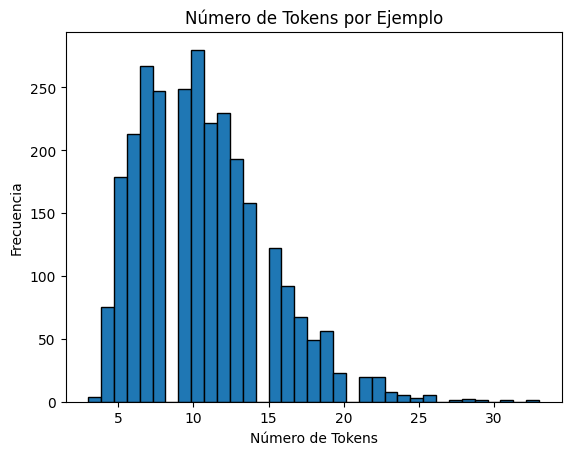

Total de ejemplos: 2793
Percentil 25: 7.0
Percentil 50 (Mediana): 10.0
Percentile 75: 13.0
Max: 33


In [ ]:
# @markdown ‚ùó
# Generaci√≥n de histograma de n√∫mero de tokens por ejemplos
import matplotlib.pyplot as plt
import numpy as np

# C√°lculo de n√∫mero de tokens por ejemplos
def count_tokens_fn(batch):
    tokenized_batch = tokenizer(batch['samples'])
    tokenized_batch['count'] = [len(tks) for tks in tokenized_batch['input_ids']]
    return tokenized_batch

result = bert_ds.map(
    function=count_tokens_fn,
    batched=True
)

num_of_tokens_list = result['train']['count'] + result['test']['count']

# Generaci√≥n de histograma
plt.hist(num_of_tokens_list, bins=35, edgecolor='k')
plt.xlabel('N√∫mero de Tokens')
plt.ylabel('Frecuencia')
plt.title('N√∫mero de Tokens por Ejemplo')
plt.show()

# C√°lculo de percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = np.percentile(num_of_tokens_list, [25, 50, 75])

print(f"Total de ejemplos: {len(num_of_tokens_list)}")
print(f"Percentil 25: {percentiles[0]}")
print(f"Percentil 50 (Mediana): {percentiles[1]}")
print(f"Percentile 75: {percentiles[2]}")
print(f"Max: {np.max(num_of_tokens_list)}")

- A continuaci√≥n, la funci√≥n auxiliar `tokenize_data_fn` servir√° para tokenizar y codificar el conjunto completo de datos de manera eficiente mediante el [m√©todo `map`](https://huggingface.co/docs/datasets/about_map_batch).
- Lo que devolver√° ser√° un nuevo dataset cuyos tokens estar√°n ''convertidos'' en:
    - √≠ndices del vocabulario (*input_ids*),
    - m√°scaras de atenci√≥n [(*attention_mask*)](https://huggingface.co/docs/transformers/glossary#attention-mask),
    - tipos de tokens [(*token_type_ids*)](https://huggingface.co/docs/transformers/glossary#token-type-ids),
    - y etiquetas (*labels*) que ser√°n utilizadas como `Ground Truth` en la etapa de entrenamiento.
- `MAX_TOKEN_LENGTH`: Indica el m√°ximo n√∫mero de tokens que el modelo utilizar√° para codificar cada ejemplo/muestra. Debemos aumentarlo cuando los ejemplos de nuestro conjunto de datos son m√°s largos, pero cuanto m√°s largos son, m√°s espacio ocupan en la memoria. Una estrategia com√∫n para determinar el tama√±o m√°ximo de tokens es realizar un histograma y quedarnos con el valor del percentil 75% del largo de los ejemplos. Tambi√©n podemos utilizar el n√∫mero de tokens de la secuencia m√°s larga si disponemos de suficiente capacidad de memoria.

In [ ]:
# @markdown ‚ùó
# Tokenizaci√≥n de conjunto de datos completo

# N√∫mero m√°ximo de tokens a utilizar
MAX_TOKEN_LENGTH = 32 # @param {type:"slider", min:8, max:128, step:8}

def tokenize_data_fn(batch):
    tokenized_sample = tokenizer(
        batch['samples'],
        max_length=MAX_TOKEN_LENGTH,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
    )

    tokenized_sample["labels"] = tokenized_sample['input_ids'].clone()
    return tokenized_sample

tokenized_bert_ds = bert_ds.map(
    function=tokenize_data_fn,
    batched=True,
    remove_columns=["samples"]
)

print(tokenized_bert_ds)

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 558
    })
})


In [ ]:
# @markdown üîé
# Visualizaci√≥n de proceso de tokenizaci√≥n para el primer ejemplo del conjunto de datos
sample = tokenized_bert_ds["train"][0]

print(f"- input_ids:        {sample['input_ids']}")
print(f"- attention_mask:   {sample['attention_mask']}")
print(f"- token_type_ids:   {sample['token_type_ids']}")
print(f"- labels:           {sample['labels']}")

- input_ids:        [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 1067, 7566, 1059, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
- attention_mask:   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- token_type_ids:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- labels:           [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 1067, 7566, 1059, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Enmascarado Aleatorio

> Este proceso es el encargado de ocultar aleatoriamente el 15\% de los tokens y formatear los datos de entrenamiento de manera adecuada, asegurando que las secuencias de entrada tengan la longitud correcta y que las m√°scaras de atenci√≥n se apliquen correctamente.

* Para implementar este proceso de manera sencilla, utilizaremos el m√©todo [DataCollatorForLanguageModeling](https://huggingface.co/docs/transformers/v4.32.1/en/main_classes/data_collator#transformers.DataCollatorForLanguageModeling) proporcionado por la biblioteca de Hugging Face.

* Como se podr√° observar en el siguente ejemplo, es com√∫n utilizar un valor especial como **-100** en la salida de las etiquetas (*labels*) para indicar la posici√≥n de los tokens que se **IGNORAN** en el c√°lculo de la funci√≥n de p√©rdida llevada a cabo durante el entrenamiento.

In [ ]:
# @markdown ‚ùó
import torch, random
from transformers import DataCollatorForLanguageModeling

data_collate_fn = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm_probability=0.15
)

In [ ]:
# @markdown üîé
# Visualizacion de proceso de 'enmascarado aleatorio' de tokens
seed = random.randint(0,100)
samples = [tokenized_bert_ds['train'][i] for i in range(3)]

print("DataCollator Outputs")
torch.manual_seed(seed)
print("--- Tokens:")
for sample in data_collate_fn(samples)['input_ids']:
    print(f">> {[tokenizer.decode([tk]) for tk in sample]}'")

torch.manual_seed(seed)
print("\n--- 'input_ids':")
for sample in data_collate_fn(samples)['input_ids']:
    print(f">> {sample.tolist()}'")

torch.manual_seed(seed)
print("\n--- 'labels':")
for sample in data_collate_fn(samples)['labels']:
    print(f">> {sample.tolist()}")

DataCollator Outputs
--- Tokens:
>> ['[CLS]', 'pep', '##pa', ',', '¬ø', 'seguro', 'que', 'no', 'quieres', 'quitarte', '[MASK]', 'zapatos', '?', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'
>> ['[CLS]', 'por', 'muy', 'r√°pido', '[MASK]', 'corr', '##√°is', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'
>> ['[CLS]', '[MASK]', 'mis', 'chi', '##qui', '##tines', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']'

--- 'input_ids':
>> [4, 20842, 1280, 1019, 1063, 2165, 1041, 1054, 1803, 25428, 0, 7566, 1059, 5, 1, 1, 1, 

### Probando el Modelo Base

- Antes de **personalizar** (adaptar) el modelo a nuestro conjunto de datos seleccionado, veremos c√≥mo se desenvuelve en la tarea de *fill-mask*.

- Para ello, escriba una frase muy caracter√≠stica del dominio al que se quiere adaptar, y enmascare alguna de sus palabras utilizando el token `[MASK]`.


In [ ]:
# @markdown üîé
# Ejemplo para espa√±ol, pensando en adaptar el modelo a Peppa Pig
# Usamos pipeline como funci√≥n auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="dccuchile/bert-base-spanish-wwm-uncased",
    top_k=5
)

ejemplo = 'A Peppa le encanta saltar en los [MASK] de barro' # @param {type:"string"}
fill_mask(ejemplo)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.22510391473770142,
  'token': 12837,
  'token_str': 'lagos',
  'sequence': 'a peppa le encanta saltar en los lagos de barro'},
 {'score': 0.11403446644544601,
  'token': 4473,
  'token_str': 'juegos',
  'sequence': 'a peppa le encanta saltar en los juegos de barro'},
 {'score': 0.10608471930027008,
  'token': 16441,
  'token_str': 'puentes',
  'sequence': 'a peppa le encanta saltar en los puentes de barro'},
 {'score': 0.0892326682806015,
  'token': 24094,
  'token_str': 'castillos',
  'sequence': 'a peppa le encanta saltar en los castillos de barro'},
 {'score': 0.041719574481248856,
  'token': 13452,
  'token_str': 'muros',
  'sequence': 'a peppa le encanta saltar en los muros de barro'}]

In [ ]:
# @markdown üîé
# Ejemplo para ingl√©s, pensando en adaptar el modelo a VizWiz
# Usamos pipeline como funci√≥n auxiliar de alto nivel
from transformers import pipeline

fill_mask = pipeline(
    task="fill-mask",
    model="bert-base-uncased",
    top_k=5
)

ejemplo = "Can you [MASK] me the model on the back of the iPhone?" # @param {type:"string"}
fill_mask(ejemplo)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.7363616228103638,
  'token': 2265,
  'token_str': 'show',
  'sequence': 'can you show me the model on the back of the iphone?'},
 {'score': 0.10993441939353943,
  'token': 2425,
  'token_str': 'tell',
  'sequence': 'can you tell me the model on the back of the iphone?'},
 {'score': 0.07615769654512405,
  'token': 2507,
  'token_str': 'give',
  'sequence': 'can you give me the model on the back of the iphone?'},
 {'score': 0.010203925892710686,
  'token': 2131,
  'token_str': 'get',
  'sequence': 'can you get me the model on the back of the iphone?'},
 {'score': 0.009682041592895985,
  'token': 4604,
  'token_str': 'send',
  'sequence': 'can you send me the model on the back of the iphone?'}]

### Entrenamiento para adaptaci√≥n

- Una vez definido el conjunto de datos y completado el proceso de tokenizaci√≥n, pasemos a la parte m√°s intensa computacionalmente, el entrenamiento.
- A continuaci√≥n, definimos las configuraciones del entrenamiento mediante [`TrainingArguments`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.TrainingArguments).
- ... y definimos el entrenamiento del modelo mediante la clase  [`Trainer`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.Trainer).


1.   ***epochs***: N√∫mero de √©pocas de entrenamiento. En cada epoch, el algoritmo de entrenamiento recibe cada uno de los ejemplos del dataset de entrenamiento.
2.  ***batch_size***: Cantidad de datos procesados por iteraci√≥n antes de actualizar el modelo (aumentar este n√∫mero mejora las estimaciones de cada iteraci√≥n ya que ser√° una muestra m√°s representativa del dataset en general, pero requerir√° m√°s memoria y ser√° necesario monitorizar y re-ajustar el `learning_rate`)
3.  ***learning_rate***:  Tama√±o del ''ajuste'' realizado en el modelo en cada iteraci√≥n, mientras se avanza hacia un m√≠nimo de la funci√≥n de p√©rdida.

**Nota**: El valor de estos par√°metros, en conjunci√≥n al poder de c√≥mputo disponible, determinar√° el tiempo y la cantidad de c√°lculo requerido para poder realizar el entrenamiento del modelo. Puede ir desde unos segundos hasta varios minutos.

In [ ]:
# @markdown ‚ùó
from transformers import TrainingArguments, Trainer, BertForMaskedLM

# Eliminaci√≥n de checkpoints anteriores
!rm -r "$CUSTOM_MODEL_CHECKPOINT"

# Configuraci√≥n de hiperpar√°metros
MODEL_CHECKPOINT = "dccuchile/bert-base-spanish-wwm-uncased" # @param ["dccuchile/bert-base-spanish-wwm-uncased", "bert-base-uncased"]
BATCH_SIZE = 64 # @param {type:"slider", min:8, max:64, step:8}
LEARNING_RATE = 2e-5 # @param {type:"number"}
EPOCHS = 5 # @param {type:"slider", min:3, max:15, step:1}
LOGGING_STEPS = len(tokenized_bert_ds["train"]) // BATCH_SIZE
CUSTOM_MODEL_CHECKPOINT = "bert_adaptation_" + DATASET_NAME.replace(" ", "_")[:-5].lower()

# Configuraci√≥n de entrenamiento
training_args = TrainingArguments(
    output_dir=CUSTOM_MODEL_CHECKPOINT,
    overwrite_output_dir=True,
    evaluation_strategy="epoch",
    num_train_epochs=EPOCHS,
    optim='adamw_torch',
    learning_rate=LEARNING_RATE,
    weight_decay=0.01,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    push_to_hub=False,
    fp16=True,
    logging_steps=LOGGING_STEPS,
    report_to="none",
    save_strategy="no"
)

# Instanciaci√≥n de modelo
model = BertForMaskedLM.from_pretrained(MODEL_CHECKPOINT)

# Instanciaci√≥n de clase Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_bert_ds["train"],
    eval_dataset=tokenized_bert_ds["test"],
    data_collator=data_collate_fn,
    tokenizer=tokenizer,
)

trainer.args._n_gpu = 1

rm: cannot remove '': No such file or directory


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


* Antes de comenzar el entrenamiento, calcularemos la [**Perplexity**](https://huggingface.co/docs/transformers/perplexity) del modelo de lenguaje.



üìñ Perplexity

> La `Perplexity` es una m√©trica que nos permite evaluar cu√°nta incertidumbre tiene un modelo cuando tiene que predecir palabras en un conjunto de prueba determinado. La misma, ayuda a medir qu√© tan bien conoce el modelo el lenguaje, y cu√°n coherentes ser√°n sus predicciones. En general, una *perplejidad* m√°s baja indicar√° que el modelo genera textos que claramente pertenecen al lenguaje.
<center>
<img src="https://thegradient.pub/content/images/size/w1600/2020/04/xkcd_entropy-2.png" width=50%>
</center>
fuente: https://thegradient.pub/understanding-evaluation-metrics-for-language-models/

Si queremos evaluar qu√© tanto se adapta un modelo a un dominio determinado, podemos estimar su perplejidad para las tareas de completar palabras (MLM) o generaci√≥n de texto en oraciones del dominio de inter√©s, ya sea sobre conjunto de oraciones que nos interesen particularmente (un *benchmark* o *testbed*) o sobre un  corpus representativo del dominio en general.

> Los animamos a crear un mini-testbed, una listita de oraciones que les permita ver r√°pidamente qu√© pasa con diferentes tipos de adaptaciones. Les va a servir mucho para monitorear de forma sistem√°tica los cambios en su sistema! Luego pueden compartir sus testbeds con la comunidad, un buen testbed vale oro :-).

In [ ]:
# @markdown  üîé
import math

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Estimaci√≥n de perplexity previa a entrenamieto
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 137.82


In [ ]:
# @markdown ‚ùó‚è≥
# Inicio de entrenamiento
trainer.train()

# Guardado de entrenamiento
trainer.save_model(CUSTOM_MODEL_CHECKPOINT)


* Ahora, estimemos nuevamente la `perplexity` del modelo y comparemos con el valor obtenido previamente.

In [ ]:
# @markdown üîé
# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Estimaci√≥n de perplexity posterior a entrenamiento
eval_results = trainer.evaluate()
print(f">>> Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

>>> Perplexity: 8.95



### Probando el Modelo Adaptado

- Ahora que tenemos el modelo entrenado con el dataset espec√≠fico, la pregunta es, ¬øC√≥mo se comportar√°?
- Para ello volvemos a hacer la prueba anterior utilizando la tarea de *fill-mask*, quiz√°s esta vez con resultados m√°s ajustados al dominio. Ac√° es donde se luce un buen testbed!
- Para que los resultados sean mas f√°ciles de comparar, la funci√≥n `compare_models()` ser√° la encargada de procesar y retornar, para cada oraci√≥n de ejemplo ingresada, un ranking comparativo de las predicciones realizadas entre el nuevo modelo adaptado y el modelo base original.

In [ ]:
# @markdown ‚ùó
import os
import transformers
from typing import List
from tabulate import tabulate
from transformers import pipeline

# Funci√≥n auxiliar para comparaci√≥n de predicciones de modelos
def compare_models(
    custom_model: transformers.pipelines.fill_mask.FillMaskPipeline,
    base_model: transformers.pipelines.fill_mask.FillMaskPipeline,
    sentences: List[str],
    top_k=5
) -> None:

    headers = ['Sent','Custom Bert', '(%)', 'Base Bert', '(%)']
    rows = []
    for sent in sentences:
        rows.append([sent, '', '', '', ''])

        c_out = custom_model(sent)
        o_out = base_model(sent)

        c_tokens = [(i['token_str'], str(round(i['score']*100,1))+"%") for i in c_out]
        o_tokens = [(i['token_str'], str(round(i['score']*100,1))+"%") for i in o_out]

        for (p1,s1), (p2,s2) in zip(c_tokens, o_tokens):
            rows.append(['', p1, s1, p2, s2])

    table = tabulate(rows, headers=headers, tablefmt="text", numalign="center")
    print(table, "\n")

# Instanciaci√≥n de modelo personalizado y modelo base
base_model = pipeline(task="fill-mask", model=MODEL_CHECKPOINT, device='cuda')
custom_model = pipeline(task="fill-mask", model=CUSTOM_MODEL_CHECKPOINT, device='cuda')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# @markdown ‚ùó

# Conjunto de ejemplos de prueba
vizwiz_test_examples = [
    "can you tell me the title of the book? [MASK].",
    "please [MASK] this shirt",
    "what [MASK] is this?",
    "[MASK] can you tell me what is this?",
    "how clear is this [MASK]?",
    "is the floor [MASK]?",
    "the microwave is [MASK]?."
]

vinos_test_examples = [
    "Este [MASK] argentino de altura es una verdadera",
    "Con un color profundo e [MASK]",
    "Los sabores de [MASK] persisten",
    "Hecho 100% de [MASK]",
    "El sabor fue [MASK]",
    "Con su [MASK] mezcla de minerales",
    "Por primera vez en [MASK],",
    "Brazamora de [MASK] bonito"
]

martin_fierro_test_examples = [
    "En los campos de la [MASK] extensa",
    "donde el viento y el sol se [MASK]",
    "cabalgo firme con mi [MASK]",
    "bajo el cielo de [MASK] risue√±o",

    "Con mi [MASK] y mi lazo",
    "enfrento a la [MASK] con valor",
    "bati√©ndome siempre a mi [MASK]",
    "en este ancho y rudo [MASK]",

    "As√≠ cabalgo con alma [MASK]",
    "como otros en su [MASK]",
    "defendiendo mi [MASK] y mi gente",
    "en esta tierra que [MASK] sin cesar",

    "Con [MASK] al cinto, firme y diestro",
    "Enfrento [MASK], firme como el resto",
    "Mate en mano, bajo el cielo [MASK]",
    "Mi coraje y mi [MASK], jam√°s han claudicado."
]

peppa_pig_test_examples = [
    "[MASK], puedes decir dinosarurio?",
    "¬°Hola, soy Peppa [MASK]!",
    "George tiene un [MASK] muy querido.",
    "El sol brilla en el [MASK] del jard√≠n.",
    "Peppa y George juegan en el [MASK].",
    "Mam√° Pig prepara [MASK] deliciosos.",
    "Vamos al [MASK] para montar en bicicleta.",
    "El [MASK] est√° lleno de flores hermosas.",
    "Peppa y sus amigos tienen [MASK] en el parque."
]

# Moficar 'sentences' acorde al conjunto de datos utilizado para la personalizaci√≥n
compare_models(
    custom_model=custom_model,
    base_model=base_model,
    sentences=peppa_pig_test_examples
)

Sent                                            Custom Bert    (%)    Base Bert    (%)
----------------------------------------------  -------------  -----  -----------  -----
[MASK], puedes decir dinosarurio?
                                                george         30.7%  uh           10.4%
                                                papi           8.7%   si           7.6%
                                                mami           8.4%   oh           6.3%
                                                ¬ø              4.4%   espera       6.3%
                                                oh             4.2%   um           5.9%
¬°Hola, soy Peppa [MASK]!
                                                pig            77.0%  [UNK]        5.1%
                                                george         1.3%   pep          3.6%
                                                mam√°           1.3%   !            3.1%
                                                /        

### Subiendo tu modelo a Hugging Face  ü§ó

Quer√©s que tu familia, amigos y futuros empleadores puedan probar tu chatbot? En Huggingface ü§ó pod√©s desplegar una demo muy f√°cilmente:

> Recorda generar tu **token de acceso** siguendo las instrucciones de la [Secci√≥n 2](#Librer√≠as-para-modelos-de-lenguaje). Ser√° necesario para que puedas autentificarte en la plataforma y subir tu modelo.

In [ ]:
# @markdown ‚ùó
# Logeo a plataforma mediante token de acceso
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# @markdown ‚ùó
# Esto env√≠a el modelo entrenado al repositorio de modelos de Hugging Face.
trainer.push_to_hub()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jbarsce/bert_adaptation_peppa_pig/commit/ce4ce3f3283d1400da3e099e321fe9a229e007bd', commit_message='End of training', commit_description='', oid='ce4ce3f3283d1400da3e099e321fe9a229e007bd', pr_url=None, pr_revision=None, pr_num=None)

## 4.2 - ¬øC√≥mo personalizar un modelo GPT?


- Se inicia por alg√∫n modelo pre-entrenado para la tarea espec√≠fica que uno busca (e.g. clasificaci√≥n, generaci√≥n, etc).
- Se toma un corpus especializado (anotado, revisado, etc.) y se entrena utilizando dicho corpus.
- Intentaremos [entrenar que un modelo genere texto](https://github.com/huggingface/notebooks/blob/main/examples/language_modeling.ipynb) con el estilo de alguno de los conjuntos de datos disponibles para este taller.
- Utilizaremos el modelo `DeepESP/gpt2-spanish` como base para espa√±ol y el modelo `gpt2` como base para ingl√©s.
* A diferencia de la adaptaci√≥n de dominio realizada en el modelo BERT, los modelos de generaci√≥n de texto se entrenan utilizando una tarea auto-supervisada denominada [*Causal Language Modeling*](https://huggingface.co/docs/transformers/tasks/language_modeling).


### Carga de Datasets

* Utilizaremos la librer√≠a `datasets` de HuggingFace para cargar cada uno de los corpus seleccionados.
* Para la personalizaci√≥n de GPT, tenemos un total de 6 conjuntos de datos, todos en espa√±ol:
    * Julio Cort√°zar (es):
      * ‚âà 14k oraciones/muestras.
      * Extra√≠do de una selecci√≥n de libros y cuentos del autor argentino.
    * Edgar Allan Poe (es):
      * ‚âà 48k oraciones/muestras.
      * Extra√≠do de una selecci√≥n de libros y cuentos del autor estadounidense traducidos al espa√±ol.
    * Jos√© Saramago (es):
      * ‚âà 105k oraciones/muestras.
      * Extra√≠do de una selecci√≥n de libros y cuentos del autor portugu√©s traducidos al espa√±ol.
    * Peppa Pig (es):
      * ‚âà 3k oraciones/muestras.
      * Extra√≠do de subt√≠tulos de 77 episodios.
    * Martin Fierro (es):
      * ‚âà 2k estrofas/muestras.
      * Extra√≠do del libro completo de Jos√© Hern√°ndez
    * Rese√±as de Vinos (es):
      * ‚âà 130k oraciones/muestras.
      * Extra√≠do de descripciones de vinos de todo el mundo.

* A continuaci√≥n, seleccionen de la lista desplegable el dataset que mas nos interese.
* En `max_samples`, elijan un l√≠mite m√°ximo de datos para acotar el c√≥mputo necesario.
* Autom√°ticamente el siguiente c√≥digo dividir√° el dataset elegido en dos partes:
    * El 80% como conjunto de entrenamiento.
    * El 20% como conjunto de test.


In [ ]:
# @markdown ‚ùó
# @title  { run: "auto" }
import os
import torch
from datasets import load_dataset, Dataset

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

# Recolecci√≥n de par√°metros de formulario
dataset_name = "Peppa Pig (es)" # @param ["Resenas de Vinos (es)", "Martin Fierro (es)", "Peppa Pig (es)", "Julio Cortazar (es)", "Edgar Allan Poe (es)", "Jose Saramago (es)"]
max_samples = 30000 # @param {type:"number"}
name_to_file = {
    'Resenas de Vinos (es)'         : "wines_es.csv",
    'Martin Fierro (es)'            : "martin_fierro_v2.csv",
    'Peppa Pig (es)'                : "peppa_pig.csv",
    'Julio Cortazar (es)'           : "cortazar.csv",
    'Edgar Allan Poe (es)'          : "poe.csv",
    'Jose Saramago (es)'            : "saramago.csv",
}

# Carga de conjunto de datos
gpt2_ds = load_dataset(
    path=DATASETS_PATH,
    data_files={'all_data': name_to_file[dataset_name]},
)

# Divisi√≥n de conjunto de datos en subconjuntos de entrenamiento y testeto
total_size = min(max_samples, len(gpt2_ds['all_data']))
val_size = int(total_size *.2)
train_size = total_size - val_size

gpt2_ds = gpt2_ds["all_data"].train_test_split(
    train_size=train_size,
    test_size=val_size,
    seed=42
)

print(f"* Informaci√≥n del dataset '{dataset_name}':\n---")
gpt2_ds

* Informaci√≥n del dataset 'Peppa Pig (es)':
---


DatasetDict({
    train: Dataset({
        features: ['samples'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['samples'],
        num_rows: 558
    })
})

In [ ]:
# @markdown üîé
# Visualizaci√≥n de primeros 15 ejemplos del dataset
for sample in gpt2_ds['train']['samples'][:15]:
    print(f">> {sample}")

>> Peppa, ¬øseguro que no quieres quitarte los zapatos?
>> por muy r√°pido que corr√°is.
>> Hola mis chiquitines.
>> ¬°No tiene gracia!
>> No te preocupes Peppa, soy un experto en montar tiendas.
>> ¬°Oh, es un vestido, y es precioso!
>> ¬°Y yo!
>> No pasa nada, esos estaban ya un poco viejos.
>> Pap√° Pig vuela la cometa.
>> La tita Pig ha tra√≠do a Cloe para que pase el d√≠a en casa de Peppa. 
>> George, ¬°Vamos a disfrazarnos y a hacer (como) que somos pap√° y mam√°.
>> ¬°Castillo del viento all√° vamos!
>> !Soy una mariposa! ¬°soy una mariposa!
>> S√≠, pobre Tedy. Vamos a secarlo.
>> Voy a mover mi varita m√°gica‚Ä¶ 


### Probando el Modelo Base

- Antes de ajustar el modelo veamos c√≥mo se desenvuelve en la tarea de generaci√≥n de texto al proporcionarle como entrada la frase:
> `Ayer, al despertarme `

Luego del entrenamiento, volveremos a comparar su estilo de generaci√≥n.

In [ ]:
# @markdown ‚ùó
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

BASE_MODEL = "DeepESP/gpt2-spanish" # @param ["DeepESP/gpt2-spanish", "gpt2"]
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)

tokenizer_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/499k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/261M [00:00<?, ?B/s]

In [ ]:
# @markdown üîé

# Fijamos semilla para reproducibilidad de resultados
torch.manual_seed(42)

input_ids = tokenizer.encode("Ayer, al depertarme", return_tensors='pt')
sampling_output = model.generate(input_ids, do_sample=True, max_length=50, top_k=50, top_p=0.95, pad_token_id=tokenizer.eos_token_id)
output = tokenizer.decode(sampling_output[0], skip_special_tokens=True)

print(output)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Ayer, al depertarme en el lecho de muerte de un hombre cuyo car√°cter me dec√≠a que era un asesino, y cuyo n√∫mero y su hora se me antojaban tan pr√≥ximos como a la hora en que pod√≠a morir en las c√°rceles de las Tuller


### Tokenizando los datos


- Al igual que en la primera parte de este taller, tokenizaremos el dataset.
- Realizaremos un histograma de la frecuencia de tokens por ejemplo, y utilizaremos esta informaci√≥n para posteriormente realizar la tokenizaci√≥n del dataset completo.


Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

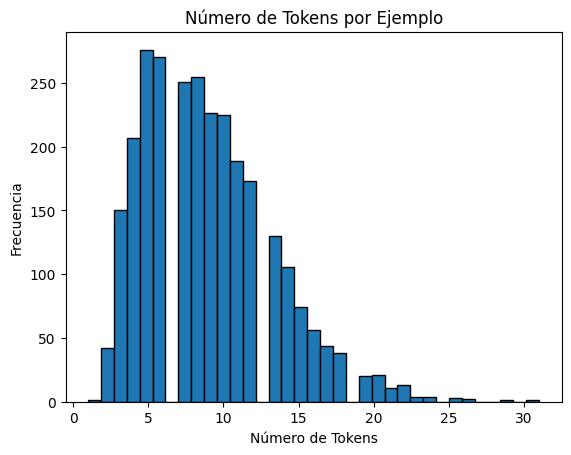

Total de ejemplos: 2793
Percentil 25: 6.0
Percentil 50 (Mediana): 8.0
Percentile 75: 12.0
Max: 31


In [ ]:
# @markdown ‚ùó
# Generaci√≥n de histograma del n√∫mero de tokens por ejemplos
import matplotlib.pyplot as plt
import numpy as np

# C√°lculo de n√∫mero de tokens por ejemplos
def count_tokens_fn(batch):
    tokenized_batch = tokenizer(batch['samples'])
    tokenized_batch['count'] = [len(tks) for tks in tokenized_batch['input_ids']]
    return tokenized_batch

result = gpt2_ds.map(
    function=count_tokens_fn,
    batched=True
)

num_of_tokens_list = result['train']['count'] + result['test']['count']

# Generaci√≥n de histograma
plt.hist(num_of_tokens_list, bins=35, edgecolor='k')
plt.xlabel('N√∫mero de Tokens')
plt.ylabel('Frecuencia')
plt.title('N√∫mero de Tokens por Ejemplo')
plt.show()

# C√°lculo de percentiles (e.g., 25th, 50th, and 75th percentiles)
percentiles = np.percentile(num_of_tokens_list, [25, 50, 75])

print(f"Total de ejemplos: {len(num_of_tokens_list)}")
print(f"Percentil 25: {percentiles[0]}")
print(f"Percentil 50 (Mediana): {percentiles[1]}")
print(f"Percentile 75: {percentiles[2]}")
print(f"Max: {np.max(num_of_tokens_list)}")

- Al igual que antes, en `MAX_TOKEN_LENGTH` podr√°n elegir el largo m√°ximo que el modelo utilizar√° para codificar cada ejemplo/muestra de entrada. Truncando aquellos que superen este l√≠mite, y realizando un padding para homogeneizar la longitud de las muestras.

In [ ]:
# @markdown ‚ùó
# Tokenicaci√≥n de conjunto de datos completo

# N√∫mero m√°ximo de tokens a utilizar
MAX_TOKEN_LENGTH = 32 # @param {type:"slider", min:8, max:128, step:8}

def tokenize_data_fn(batch):
    tokenized_sample = tokenizer(
        batch['samples'],
        max_length=MAX_TOKEN_LENGTH,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
    )

    tokenized_sample["labels"] = tokenized_sample['input_ids'].clone()
    return tokenized_sample

tokenized_gpt2_ds = gpt2_ds.map(
    function=tokenize_data_fn,
    batched=True,
    remove_columns=["samples"]
)

print(tokenized_gpt2_ds)

Map:   0%|          | 0/2235 [00:00<?, ? examples/s]

Map:   0%|          | 0/558 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2235
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 558
    })
})


### Decodificando

- Podemos ver que los textos pasan a estar agrupados en bloques de `MAX_TOKEN_LENGTH` tokens.
- Adem√°s, vemos que el texto fue reemplazado por n√∫meros (√≠ndices en el vocabulario).
- Por √∫ltimo, si decodificamos estos n√∫meros, obtenemos el texto original.

In [ ]:
# @markdown üîé
print(len(tokenized_gpt2_ds['train'][0]['input_ids']))
print(tokenized_gpt2_ds['train'][0]['input_ids'][:10])

32
[57, 1250, 432, 21, 576, 3505, 315, 299, 366, 4577]


In [ ]:
# @markdown üîé
print(tokenizer.decode(tokenized_gpt2_ds['train'][0]['input_ids']))

Peppa, ¬øseguro que no quieres quitarte los zapatos?<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>


### Entrenamiento

- Una vez definido el conjunto de datos, pasamos a la parte m√°s intensa computacionalmente, el entrenamiento.
- Podemos decidir guardar el modelo localmente o hacer un backup de cada √©poca del modelo en Hugging Face.
- Definimos las propiedades del entrenamiento mediante [`TrainingArguments`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.TrainingArguments).
- Definimos el entrenamiento del modelo mediante [`Trainer`](https://huggingface.co/docs/transformers/v4.28.1/en/main_classes/trainer#transformers.Trainer).
    - El entrenamiento tardar√° desde unos segundos hasta varias horas dependiendo el poder de c√≥mputo, par√°metros elegidos y tama√±o del dataset.

In [ ]:
# @markdown ‚ùó‚è≥
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

# Configuraci√≥n de hiperpar√°metros
LEARNING_RATE = 2e-5 # @param {type:"number"}
BATCH_SIZE = 8 # @param {type:"slider", min:8, max:64, step:8}
EPOCHS = 5 # @param {type:"slider", min:3, max:15, step:1}
model_name = dataset_name.replace(" ", "-")[:-5]

# Configuraci√≥n de entrenamiento
training_args = TrainingArguments(
    model_name,
    evaluation_strategy='epoch',
    num_train_epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    weight_decay=0.01,
    logging_steps=5
)

# Instanciaci√≥n de modelo y clase Trainer
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_gpt2_ds['train'],
    eval_dataset=tokenized_gpt2_ds['test']
)

# Inicio de entrenamiento
trainer.args._n_gpu = 1
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


TrainOutput(global_step=1400, training_loss=0.6844832113810948, metrics={'train_runtime': 163.2572, 'train_samples_per_second': 68.45, 'train_steps_per_second': 8.575, 'total_flos': 182496153600000.0, 'train_loss': 0.6844832113810948, 'epoch': 5.0})

- Ahora ser√° necesario ingresar a la plataforma HuggingFace ü§ó para subir nuestro modelo. Luego podr√°n utilizarlo tanto en este taller con la librer√≠a `transformers` como compartir con sus amigos en la versi√≥n web.

In [ ]:
# @markdown ‚ùó

# Logeo a plataforma mediante token de acceso
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# @markdown ‚ùó

# Esto env√≠a el modelo entrenado al repositorio de modelos de Hugging Face.
trainer.push_to_hub()
tokenizer.push_to_hub(model_name)

events.out.tfevents.1727318507.82aecff6148a.211.0:   0%|          | 0.00/65.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jbarsce/Peppa-Pig/commit/7c8427113fe05138b068fafa1a108b7f1013c6d5', commit_message='Upload tokenizer', commit_description='', oid='7c8427113fe05138b068fafa1a108b7f1013c6d5', pr_url=None, pr_revision=None, pr_num=None)

### Probando el Nuevo Modelo

- Ahora que tenemos el modelo entrenado, la pregunta es, ¬øC√≥mo se comportar√°?
- Para ello volvemos a hacer la prueba anterior, quiz√°s esta vez con mejores resultados.
- En `MODEL` deber√°n pegar el link al modelo que acaban de subir. Tendr√° un formato del estilo `username/modelName`.

In [ ]:
# @markdown ‚ùó
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL = "jbarsce/Peppa-Pig" # @param {type:"string"}
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForCausalLM.from_pretrained(MODEL)

tokenizer_config.json:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/498k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.64M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/771 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

- En esta celda podr√°n probar su modelo. Les incentivamos a ser creativos con las frases que elijan para completarla y comparar los resultados del modelo base con el modelo adaptado.

In [ ]:
# @markdown ‚ùó

ejemplo = "Ayer, al despertarme" # @param {type:"string"}
input_ids = tokenizer.encode(ejemplo, return_tensors='pt')
sampling_output = model.generate(input_ids, do_sample=True, max_length=50, top_k=50, top_p=0.95, pad_token_id=tokenizer.eos_token_id)
output = tokenizer.decode(sampling_output[0], skip_special_tokens=True)

print(output)

Ayer, al despertarme a las diez y despu√©s de desayunar, pap√° Pig y Pap√° Pig han encontrado esta carta en la c√≥moda.
